In [72]:
# Import libraries necessary for this project
import pandas as pd
from pandas import DataFrame
import numpy as np
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
# Load the dataset
path="/content/Train.csv"
path1="/content/Test.csv"
train = pd.read_csv(path)
test=pd.read_csv(path1)

In [74]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Missing Value Treatment

In [75]:
missing_train_count=train.isnull().sum()
print(missing_train_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


This means that we have: 
1463 items with non defined weights
and 2410 items with non defined outlet_size

In [76]:
new_train=train.dropna(axis=0)
display(new_train.head(n=5))
missing_train_count1=new_train.isnull().sum()
print(missing_train_count1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [107]:
display(test.head())
missing_test_count=test.isnull().sum()
print(missing_test_count)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


this means that we have: 976 items with non defined weights and 1606 items with non defined outlet_size

In [108]:
new_test=test.dropna(axis=0)
display(new_test.head(n=5))
missing_test_count1=new_test.isnull().sum()
print(missing_test_count1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
13,FDU11,4.785,Low Fat,0.092738,Breads,122.3098,OUT049,1999,Medium,Tier 1,Supermarket Type1
14,DRL59,16.750,LF,0.021206,Hard Drinks,52.0298,OUT013,1987,High,Tier 3,Supermarket Type1


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


# Feature Engineering

In [77]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [78]:
new_train.nunique()

Item_Identifier              1535
Item_Weight                   409
Item_Fat_Content                5
Item_Visibility              4280
Item_Type                      16
Item_MRP                     3806
Outlet_Identifier               5
Outlet_Establishment_Year       5
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     2
Item_Outlet_Sales            2449
dtype: int64

-There are 1535 items,16 items types ,5 stores,3 locations for stores,3 store sizes,2 store types.
-item prices are more than the number of items so may be there are items having different prices in stores

In [79]:
new_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


In [109]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3099 entries, 0 to 5677
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            3099 non-null   object 
 1   Item_Weight                3099 non-null   float64
 2   Item_Fat_Content           3099 non-null   object 
 3   Item_Visibility            3099 non-null   float64
 4   Item_Type                  3099 non-null   object 
 5   Item_MRP                   3099 non-null   float64
 6   Outlet_Identifier          3099 non-null   object 
 7   Outlet_Establishment_Year  3099 non-null   int64  
 8   Outlet_Size                3099 non-null   object 
 9   Outlet_Location_Type       3099 non-null   object 
 10  Outlet_Type                3099 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 290.5+ KB


In [82]:
new_test.nunique()

Item_Identifier              1449
Item_Weight                   401
Item_Fat_Content                5
Item_Visibility              2858
Item_Type                      16
Item_MRP                     2703
Outlet_Identifier               5
Outlet_Establishment_Year       5
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     2
dtype: int64

In [83]:
new_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,3099.000000,3099.000000,3099.000000,3099.000000
mean,12.658206,0.059063,140.036189,1999.189739
std,4.616934,0.043592,61.608135,7.387906
min,4.555000,0.000000,31.990000,1987.000000
25%,8.675000,0.025824,93.310700,1997.000000
50%,12.350000,0.049154,141.315400,1999.000000
75%,16.600000,0.085354,184.993700,2004.000000
max,21.350000,0.185913,266.588400,2009.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


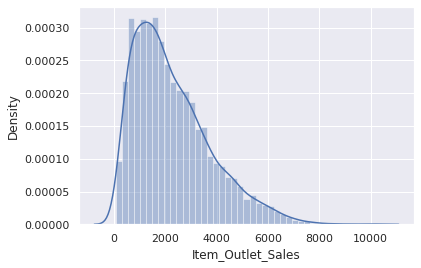

In [84]:
# Visualize skewed of Target Column
sns.distplot(new_train['Item_Outlet_Sales'])

In [85]:
print('Skew: %f' % new_train['Item_Outlet_Sales'].skew())

Skew: 1.005604


we note that :Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.

##**Data Visualizations**

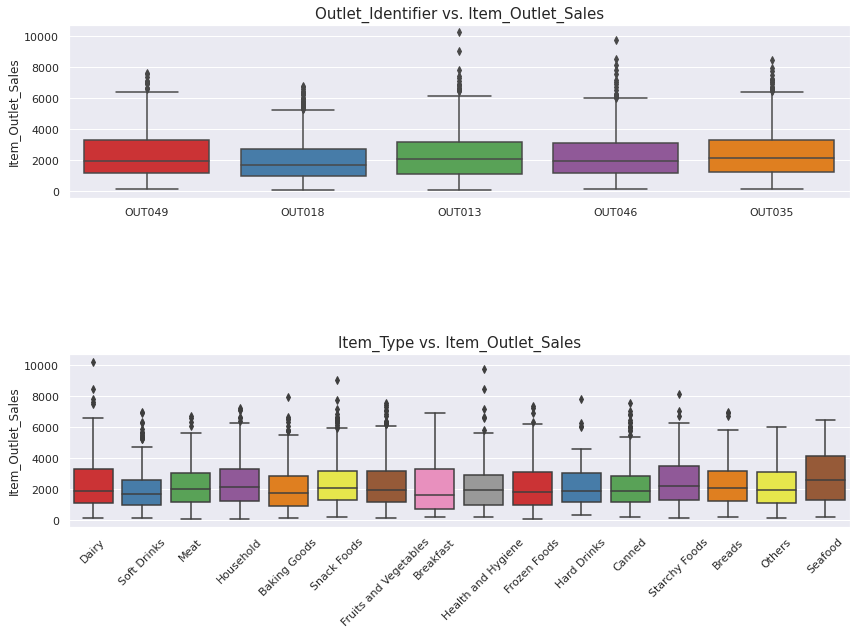

In [86]:
plt.figure(figsize = (14,9))
plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=new_train, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=new_train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

Text(0, 0.5, 'Item_Outlet_Sales')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


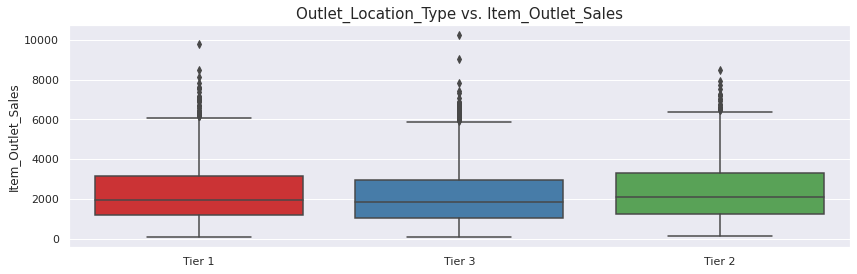

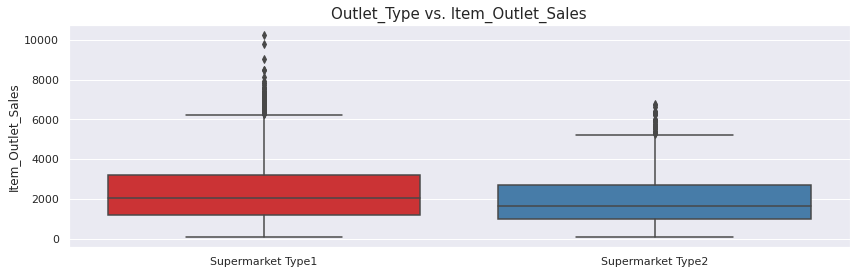

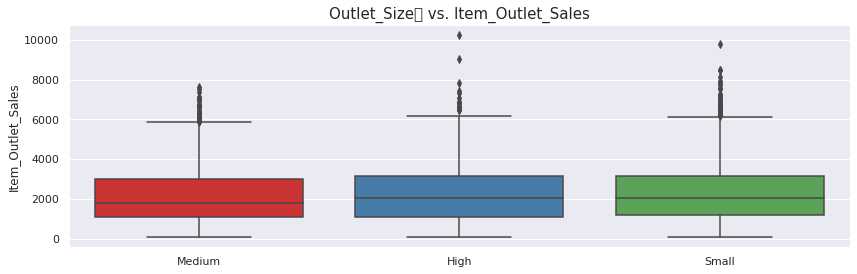

In [87]:
plt.figure(figsize = (14,9))
plt.subplot(211)
ax = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=new_train, palette="Set1")
ax.set_title("Outlet_Location_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.figure(figsize = (14,9))
plt.subplot(211)
ax = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=new_train, palette="Set1")
ax.set_title("Outlet_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.figure(figsize = (14,9))
plt.subplot(211)
ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=new_train, palette="Set1")
ax.set_title("Outlet_Size	 vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

# Encoding Categorical Variables

In [88]:
# Split the data into categorial and numerical
categorial_features = new_train.select_dtypes(include=[object])
display(categorial_features.head(n=5))
numerical_features = new_train.select_dtypes(include=[np.number])
display(numerical_features.head(n=5))

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
4,8.930,0.000000,53.8614,1987,994.7052
5,10.395,0.000000,51.4008,2009,556.6088


so we have 2  features with one hot encoding and 3 features with label encoding

In [89]:
# Apply scaler to the features
scaler = MinMaxScaler()
numerical=["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"]
features_final=new_train.drop('Item_Outlet_Sales', axis = 1)
feature_total=pd.DataFrame(features_final)
feature_total[numerical]=scaler.fit_transform(features_final[numerical])
display(feature_total.head(n=5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,0.282525,Low Fat,0.085212,Dairy,0.927446,OUT049,0.545455,Medium,Tier 1,Supermarket Type1
1,DRC01,0.081274,Regular,0.102368,Soft Drinks,0.071280,OUT018,1.000000,Medium,Tier 3,Supermarket Type2
2,FDN15,0.770765,Low Fat,0.088997,Meat,0.467837,OUT049,0.545455,Medium,Tier 1,Supermarket Type1
4,NCD19,0.260494,Low Fat,0.000000,Household,0.095036,OUT013,0.000000,High,Tier 3,Supermarket Type1
5,FDP36,0.347723,Regular,0.000000,Baking Goods,0.084583,OUT018,1.000000,Medium,Tier 3,Supermarket Type2


In [90]:
feature_final=feature_total.drop(['Item_Identifier','Outlet_Identifier'],axis =1)

In [91]:
# One Hot Encoding
feature_final = pd.get_dummies(feature_final,columns=["Item_Type","Outlet_Type"])
display(feature_final.head())

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,0.282525,Low Fat,0.085212,0.927446,0.545455,Medium,Tier 1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.081274,Regular,0.102368,0.071280,1.000000,Medium,Tier 3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.770765,Low Fat,0.088997,0.467837,0.545455,Medium,Tier 1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.260494,Low Fat,0.000000,0.095036,0.000000,High,Tier 3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0.347723,Regular,0.000000,0.084583,1.000000,Medium,Tier 3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
# Label Encoding
feature_final["Outlet_Location_Type"].value_counts()
outlet_location_type_new={"Tier 1":1,"Tier 2":2,"Tier 3":3}
feature_final["Outlet_Location_Type"].replace(outlet_location_type_new,inplace=True)
feature_final["Outlet_Location_Type"].value_counts()

1    1860
3    1860
2     930
Name: Outlet_Location_Type, dtype: int64

In [93]:
# Label Encoding
feature_final["Item_Fat_Content"].value_counts()
Item_Fat_Content_new={"Low Fat":1,"Regular":2,"LF":3,"reg":4,"low fat":5}
feature_final["Item_Fat_Content"].replace(Item_Fat_Content_new,inplace=True)
feature_final["Item_Fat_Content"].value_counts()

1    2774
2    1575
3     177
4      71
5      53
Name: Item_Fat_Content, dtype: int64

In [94]:
# Label Encoding
feature_final["Outlet_Size"].value_counts()
Outlet_Size_new={"Small":1,"Medium":2,"High":3}
feature_final["Outlet_Size"].replace(Outlet_Size_new,inplace=True)
feature_final["Outlet_Size"].value_counts()

1    1860
2    1858
3     932
Name: Outlet_Size, dtype: int64

# Checking on Data before training

In [95]:
sales=new_train["Item_Outlet_Sales"]
print(sales)

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 4650, dtype: float64


In [96]:
display(feature_final.head())

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,0.282525,1,0.085212,0.927446,0.545455,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.081274,2,0.102368,0.071280,1.000000,2,3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.770765,1,0.088997,0.467837,0.545455,2,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.260494,1,0.000000,0.095036,0.000000,3,3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0.347723,2,0.000000,0.084583,1.000000,2,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# Training Model

In [97]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'sales' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_final, 
                                                    sales, 
                                                    test_size = 0.2, 
                                                    random_state = 50)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3720 samples.
Testing set has 930 samples.


In [98]:
# Import LinearRegression algorithm
from sklearn.linear_model import LinearRegression
# Import mean squared error
from sklearn.metrics import mean_squared_error
# Initiate the model
from time import time
start = time()
# Fit the model to our dataset
model = LinearRegression()
reg=model.fit(X_train, y_train)
test_pred=reg.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
accuracy=model.score(X_test, y_test)
duration=end-start
end = time()
# Show the results
print(f"The duration of training is: {duration}")
print(f"R_squared for the validation data is:{accuracy}")
print(f"The mean squared error for the testing model is:{test_mse} ")

The duration of training is: -2574.3040730953217
R_squared for the validation data is:0.46714099374936924
The mean squared error for the testing model is:1232153.7449848724 


In [99]:
# Import Lasso Regression algorithm
from sklearn.linear_model import Lasso
# Initiate the model
start = time()
las_model = Lasso(alpha = 1, max_iter=2000, random_state=10)
# Fit the model to our dataset
las_model.fit(X_train, y_train)
test_preds = las_model.predict(X_test)
test_mse_las = mean_squared_error(y_test, test_preds)
accuracy=las_model.score(X_test, y_test)
duration=end-start
end = time()
# Show the results
print(f"The duration of training is: {duration}")
print(f"R_squared for the validation data is:{accuracy}")
print(f"The mean squared error for the testing model is:{test_mse_las} ")

The duration of training is: -0.028020858764648438
R_squared for the validation data is:0.4690557215736043
The mean squared error for the testing model is:1227726.2340831456 


In [100]:
# Import Ridge Regression algorithm
from sklearn.linear_model import Ridge
# Initiate the model
start = time()
ridg_model = Ridge(alpha=1.0)
# Fit the model to our dataset
ridg_model.fit(X_train, y_train)
test_preds = ridg_model.predict(X_test)
test_mse_ridg = mean_squared_error(y_test, test_preds)
accuracy=ridg_model.score(X_test, y_test)
end = time()
duration=end-start
# Show the results
print(f"The duration of training is: {duration}")
print(f"R_squared for the validation data is:{accuracy}")
print(f"The mean squared error for the testing model is:{test_mse_ridg} ")

The duration of training is: 0.02323436737060547
R_squared for the validation data is:0.46719785331620123
The mean squared error for the testing model is:1232022.266061952 


**Summary:**
Accuracy of MSE:46.7 %,

Accuracy of Lasso Regression: 46.9 %,

Accuracy of Ridge Regression: 46.7 %.

so we choose Lasso regression with accuracy about 46.9 %

In [102]:
# Import XGBRegressor algorithm
from xgboost import XGBRegressor
# Import mean squared error
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold, cross_val_score
# Initiate the model
start = time()
xgb_model = XGBRegressor(random_state = 10)
# Fit the model to our dataset
xgb_model.fit(X_train, y_train)
k_fold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=k_fold)
test_predsx = xgb_model.predict(X_test)
test_mse_xgb = mean_squared_error(y_test, test_predsx)
accuracy=r2_score(y_test, test_predsx)
end = time()
duration=end-start
# Show the results
print(f"The duration of training is: {duration}")
print(f"R_squared for the validation data is:{accuracy}")
print(f"The mean squared error for the model is:{test_mse_xgb} ")
print(f"K-fold CV average score: {kf_cv_scores.mean()}")

[12:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [103]:
# Import  Random Forest Regressor algorithm
from sklearn.ensemble import RandomForestRegressor
# Initiate the model
start = time()
ran_model = RandomForestRegressor(n_estimators = 50)
# Fit the model to our dataset
ran_model.fit(X_train, y_train)
test_predsr = ran_model.predict(X_test)
accuracy=r2_score(y_test, test_predsr)
test_mse_ran = mean_squared_error(y_test, test_predsr)
end = time()
duration=end-start
# Show the results
print(f"The duration of training is: {duration}")
print(f"R_squared for the validation data is:{accuracy}")
print(f"The mean squared error for the model is:{test_mse_ran} ")

The duration of training is: 0.942368745803833
R_squared for the validation data is:0.4124477270069927
The mean squared error for the model is:1358623.435187272 


# **Summary:**
Accuracy of Linear Regression:46.7 %,

Accuracy of XGB Regressor: 45.5 %,

Accuracy of Random Forest Regressor: 41.2 %.

Linear Regression is the best model for training with accuracy about 46.7 %